# Visualización de datos
Conjunto de datos del mercado de valores norteamericano de 29 empresas de 2006 a 2017. Se nos pide:

1. Preparar los datasets para crear visualizaciones
2. Graficar la siguiente información:
    - Precio de cierre de AAPL, JPM, GOOGL y AMZN para todo el período de estudio.
    - Precio máximo de AAPL en 2014, 2015, 2016 y 2017.
    - Distribución del volumen de transacciones por empresa para todo el período. Sólo incluir AAPL, JPM, GOOGL y AMZN.
    - Volumen de transacciones anual de AAPL, JPM, GOOGL y AMAZN. En el mismo gráfico debo poder comparar el volumen por año y la proporción de este que corresponde a cada empresa.
    - Relación entre los retornos diarios (`Open` - `Close` / `Open`) de las acciones de GOOGL y AMZN durante todo el período de estudio.
    
    
## Diccionario de datos

El dataset tiene las siguientes columnas:

- **Date:** fecha correspondiente al valor observado
- **Open:** Precio (en USD) al mercado abierto en la fecha especificada
- **High:** precio más alto (en USD) alcanzado durante la fecha correspondiente
- **Low:** precio más bajo (en USD) alcanzado durante la fecha correspondiente
- **Close:** Precio (en USD) al cierre del mercado en la fecha especificada
- **Volumen:** número de acciones negociadas
- **Name:** Símbolo bursátil de la empresa.


## Importar librerías y leer datos

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio

# Configurar el tema globalmente
pio.templates.default = 'plotly_dark'

url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

In [2]:
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


In [3]:
df.isna().sum()

Date       0
Open      25
High      10
Low       20
Close      0
Volume     0
Name       0
dtype: int64

## Revisiones generales

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    93612 non-null  object 
 1   Open    93587 non-null  float64
 2   High    93602 non-null  float64
 3   Low     93592 non-null  float64
 4   Close   93612 non-null  float64
 5   Volume  93612 non-null  int64  
 6   Name    93612 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [5]:
df.Date = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    93612 non-null  datetime64[ns]
 1   Open    93587 non-null  float64       
 2   High    93602 non-null  float64       
 3   Low     93592 non-null  float64       
 4   Close   93612 non-null  float64       
 5   Volume  93612 non-null  int64         
 6   Name    93612 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 5.0+ MB


In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'name'], dtype='object')

In [9]:
df

,date,open,high,low,close,volume,name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
...,...,...,...,...,...,...,...
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


## Precio de cierre de AAPL, JPM, GOOGL y AMZN para todo el período de estudio

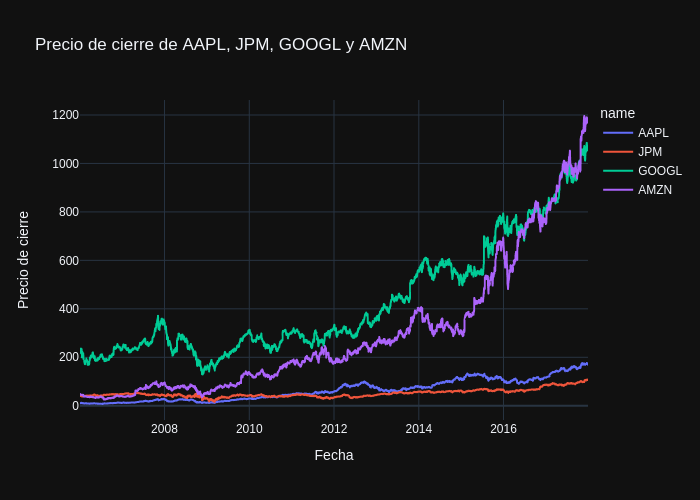

In [10]:
filtered_df = df[df['name'].isin(['AAPL', 'JPM', 'GOOGL', 'AMZN'])]

# Crear la gráfica con Plotly Express
fig = px.line(filtered_df, x='date', y='close', color='name',
            labels={'close': 'Precio de cierre', 'date': 'Fecha'},
            title='Precio de cierre de AAPL, JPM, GOOGL y AMZN')
fig.show("png")

In [11]:
df2017 = filtered_df[filtered_df.date == "2017-12-29"]

In [12]:
df2017

,date,open,high,low,close,volume,name
9058,2017-12-29,170.52,170.59,169.22,169.23,25999922,AAPL
51336,2017-12-29,108.09,108.28,106.94,106.94,8925701,JPM
87573,2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL
90592,2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN


## Precio máximo de AAPL en 2014, 2015, 2016 y 2017

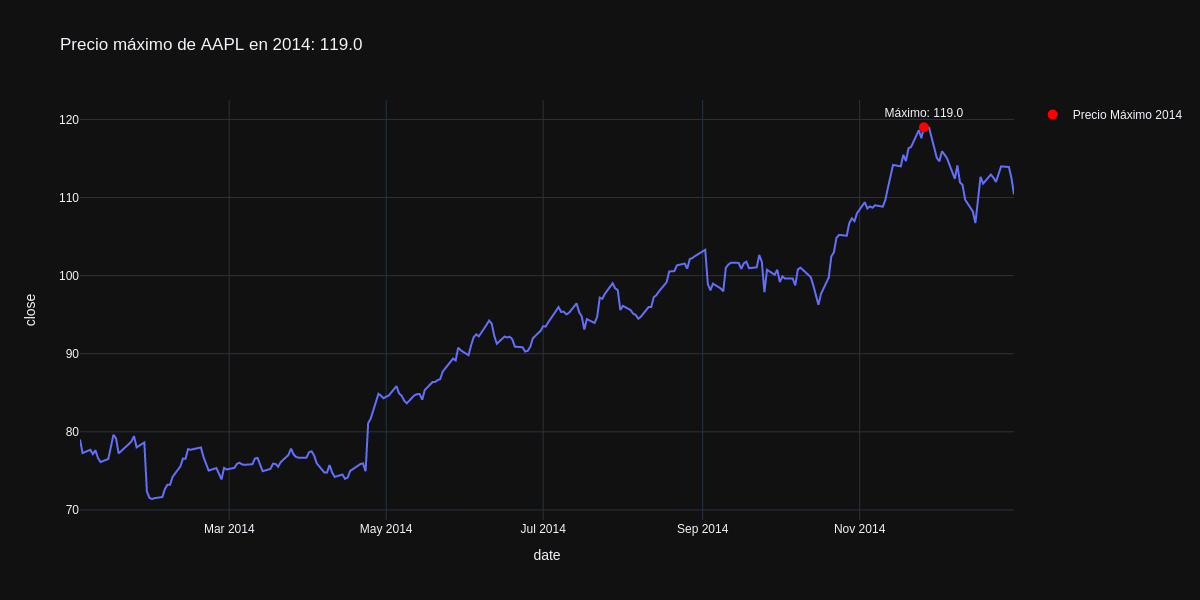

In [13]:
# Filtrar datos para la empresa AAPL y el año 2014
df_aapl_2014 = df[(df['name'] == 'AAPL') & (df['date'].dt.year == 2014)]

# Encontrar el precio máximo de cierre del año 2014
max_close = df_aapl_2014['close'].max()
max_close_row = df_aapl_2014[df_aapl_2014['close'] == max_close]
max_close_date = max_close_row['date'].values[0]

# Crear la gráfica con Plotly
fig = px.line(df_aapl_2014, x='date',
                y='close',
                title=f'Precio máximo de AAPL en 2014: {max_close}',
                height=600,
                width=1200)

# Añadir una anotación para el precio máximo
fig.add_trace(go.Scatter(
    x=max_close_row['date'],
    y=max_close_row['close'],
    mode='markers+text',
    marker=dict(color='red', size=10),
    text=[f'Máximo: {max_close}'],
    textposition='top center',
    name='Precio Máximo 2014',
))

# Mostrar la gráfica
fig.show("png")

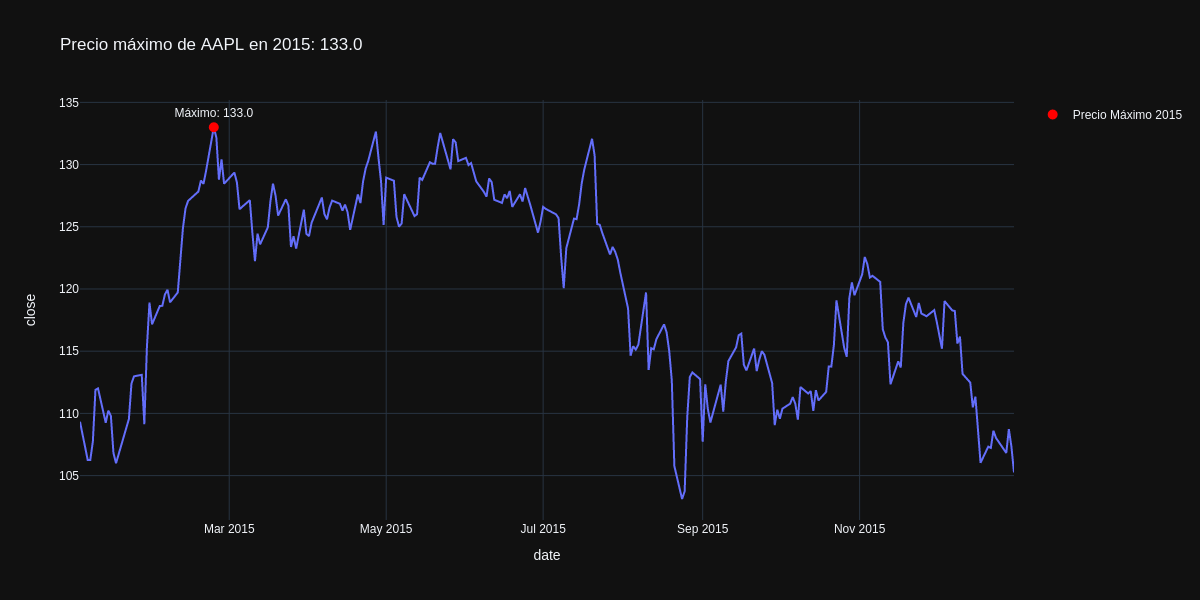

In [14]:
# Filtrar datos para la empresa AAPL y el año 2015
df_aapl_2015 = df[(df['name'] == 'AAPL') & (df['date'].dt.year == 2015)]

# Encontrar el precio máximo de cierre del año 2015
max_close = df_aapl_2015['close'].max()
max_close_row = df_aapl_2015[df_aapl_2015['close'] == max_close]
max_close_date = max_close_row['date'].values[0]

# Crear la gráfica con Plotly
fig = px.line(df_aapl_2015, x='date',
                y='close',
                title=f'Precio máximo de AAPL en 2015: {max_close}',
                height=600,
                width=1200)

# Añadir una anotación para el precio máximo
fig.add_trace(go.Scatter(
    x=max_close_row['date'],
    y=max_close_row['close'],
    mode='markers+text',
    marker=dict(color='red', size=10),
    text=[f'Máximo: {max_close}'],
    textposition='top center',
    name='Precio Máximo 2015',
))

# Mostrar la gráfica
fig.show("png")

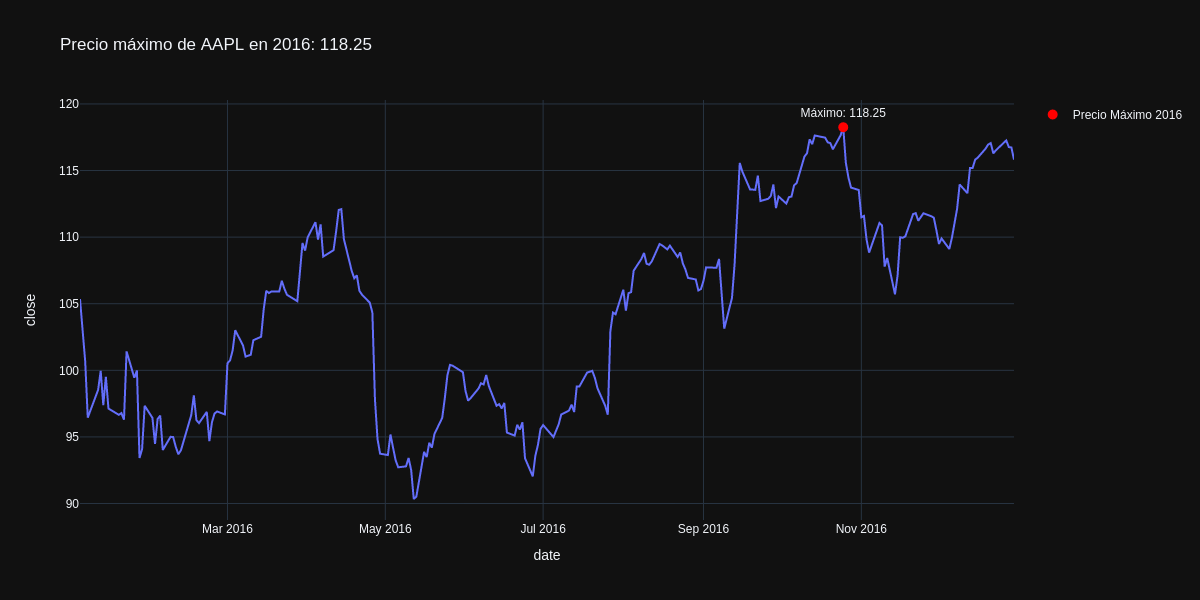

In [15]:
# Filtrar datos para la empresa AAPL y el año 2016
df_aapl_2016 = df[(df['name'] == 'AAPL') & (df['date'].dt.year == 2016)]

# Encontrar el precio máximo de cierre del año 2016
max_close = df_aapl_2016['close'].max()
max_close_row = df_aapl_2016[df_aapl_2016['close'] == max_close]
max_close_date = max_close_row['date'].values[0]

# Crear la gráfica con Plotly
fig = px.line(df_aapl_2016, x='date',
                y='close',
                title=f'Precio máximo de AAPL en 2016: {max_close}',
                height=600,
                width=1200)

# Añadir una anotación para el precio máximo
fig.add_trace(go.Scatter(
    x=max_close_row['date'],
    y=max_close_row['close'],
    mode='markers+text',
    marker=dict(color='red', size=10),
    text=[f'Máximo: {max_close}'],
    textposition='top center',
    name='Precio Máximo 2016',
))

# Mostrar la gráfica
fig.show("png")

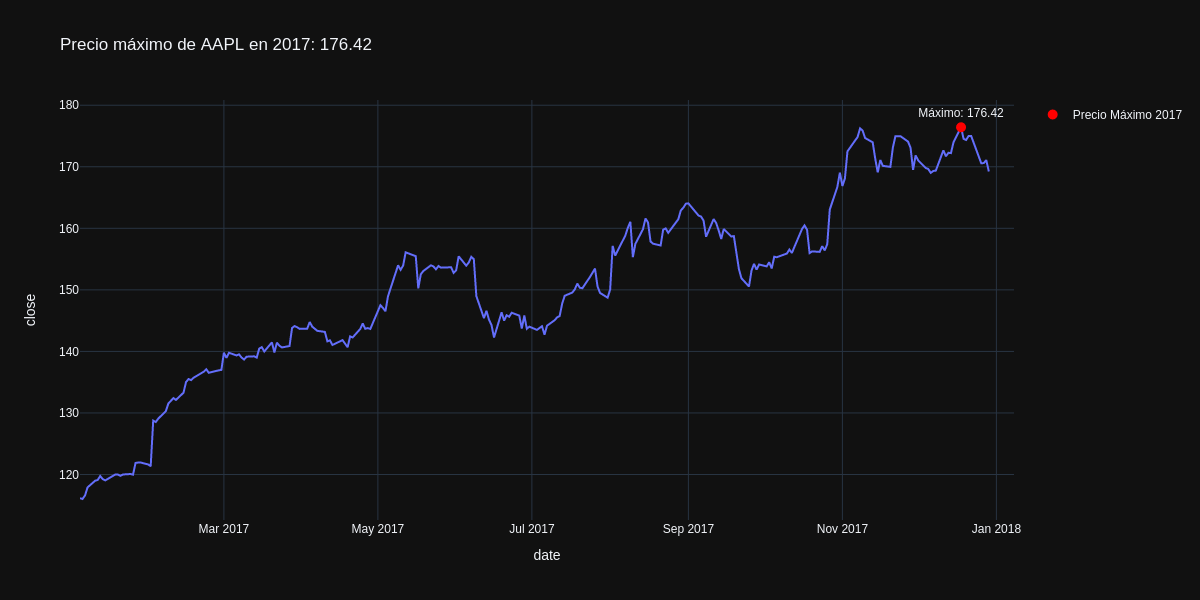

In [16]:
# Filtrar datos para la empresa AAPL y el año 2017
df_aapl_2017 = df[(df['name'] == 'AAPL') & (df['date'].dt.year == 2017)]

# Encontrar el precio máximo de cierre del año 2017
max_close = df_aapl_2017['close'].max()
max_close_row = df_aapl_2017[df_aapl_2017['close'] == max_close]
max_close_date = max_close_row['date'].values[0]

# Crear la gráfica con Plotly
fig = px.line(df_aapl_2017, x='date',
                y='close',
                title=f'Precio máximo de AAPL en 2017: {max_close}',
                height=600,
                width=1200)

# Añadir una anotación para el precio máximo
fig.add_trace(go.Scatter(
    x=max_close_row['date'],
    y=max_close_row['close'],
    mode='markers+text',
    marker=dict(color='red', size=10),
    text=[f'Máximo: {max_close}'],
    textposition='top center',
    name='Precio Máximo 2017',
))

# Mostrar la gráfica
fig.show("png")

## Distribución del volumen total de transacciones por empresa para todo el período. Sólo incluir AAPL, JPM, GOOGL y AMZN

In [17]:
filtered_df

,date,open,high,low,close,volume,name
6040,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
6041,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
6042,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
6043,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
6044,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
...,...,...,...,...,...,...,...
90588,2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN
90589,2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN
90590,2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN
90591,2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,AMZN


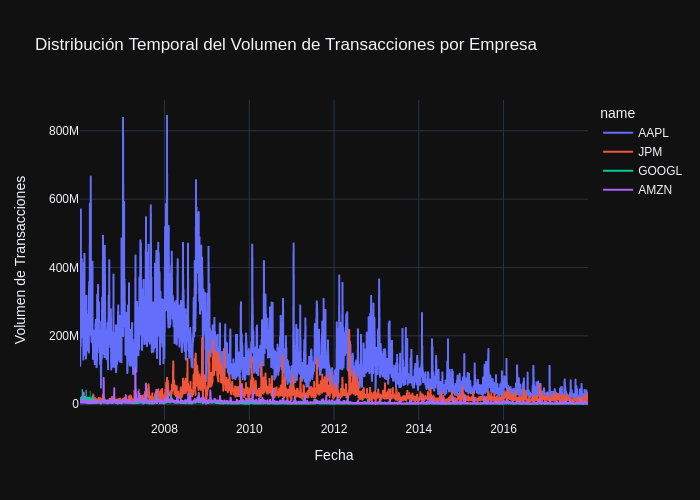

In [18]:
# Crear el gráfico de líneas
fig = px.line(filtered_df, x='date', y='volume', color='name',
              title='Distribución Temporal del Volumen de Transacciones por Empresa',
              labels={'date': 'Fecha', 'volume': 'Volumen de Transacciones'})

# Mostrar el gráfico
fig.show("png")

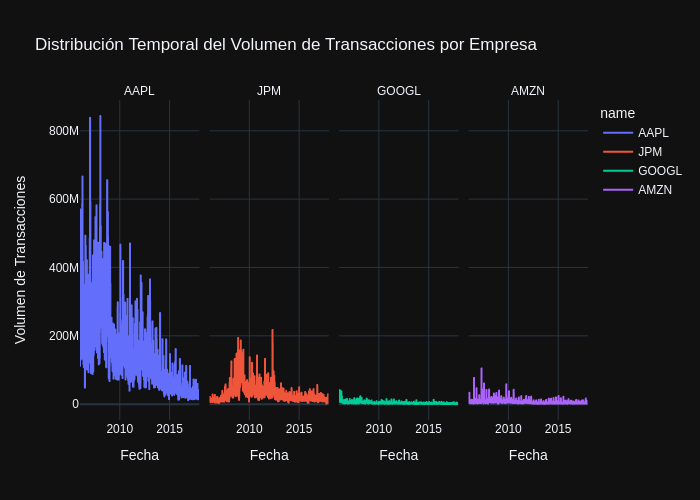

In [19]:
# Crear el gráfico de facetas
fig = px.line(filtered_df, x='date', y='volume',
                    facet_col='name',
                    color= "name",
                   title='Distribución Temporal del Volumen de Transacciones por Empresa',
                   labels={'date': 'Fecha', 'volume': 'Volumen de Transacciones'})

# Actualizar el layout
fig.update_layout(showlegend=True)

# Actualizar el layout
for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split('=')[1]  # Eliminar 'name='

# Mostrar el gráfico
fig.show("png")

## Volumen de transacciones anual de AAPL, JPM, GOOGL y AMAZN. En el mismo gráfico debo poder comparar el volumen por año y la proporción de este correspondiente a cada empresa.

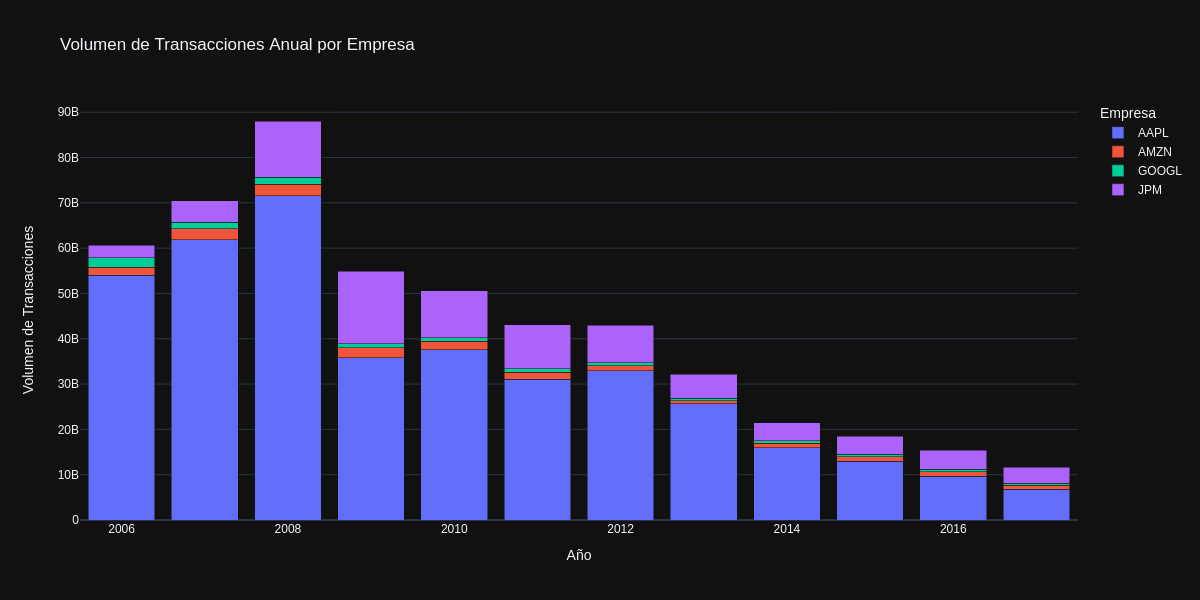

In [20]:
# Agregar columnas de año y empresa
df['year'] = pd.to_datetime(df['date']).dt.year
df['company'] = df['name']

# Filtrar los datos para las empresas específicas
filtered_df = df[df['name'].isin(['AAPL', 'JPM', 'GOOGL', 'AMZN'])]

# Calcular el volumen total por año y empresa
volume_by_year_company = filtered_df.groupby(['year', 'company'])['volume'].sum().reset_index()

# Crear el gráfico de barras apiladas
fig = px.bar(volume_by_year_company, x='year', y='volume', color='company',
             title='Volumen de Transacciones Anual por Empresa',
             labels={'year': 'Año', 'volume': 'Volumen de Transacciones', 'company': 'Empresa'},
             barmode='stack',
             height=600,
            width=1200)

# Mostrar el gráfico
fig.show("png")

## Relación entre los retornos diarios (`Open` - `Close` / `Open`) de las acciones de GOOGL y AMZN durante todo el período de estudio

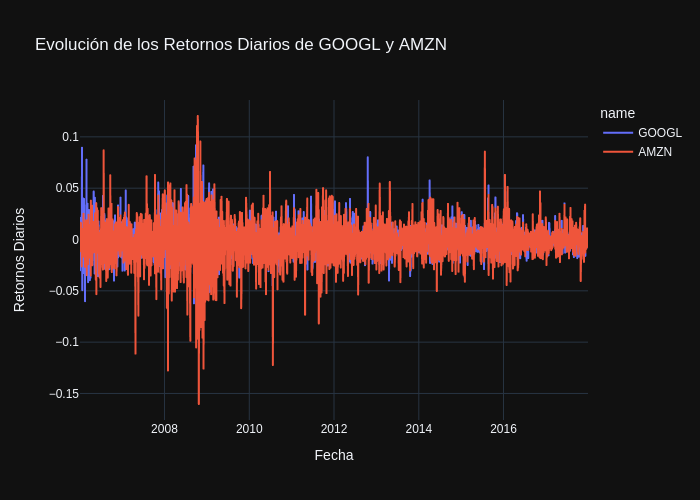

In [22]:
# Filtrar los datos para las empresas específicas (GOOGL y AMZN)
filtered_df2 = df[df['name'].isin(['GOOGL', 'AMZN'])].copy()

# Calcular los retornos diarios
filtered_df2['return'] = (filtered_df2['open'] - filtered_df2['close']) / filtered_df2['open']

# Crear el gráfico de líneas con Plotly
fig = px.line(filtered_df2, x='date', y='return', color='name',
              title='Evolución de los Retornos Diarios de GOOGL y AMZN',
              labels={'return': 'Retornos Diarios', 'date': 'Fecha'},
              hover_name='date')

# Mostrar el gráfico
fig.show("png")